In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


%matplotlib inline

In [90]:
artworks = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv')
artworks.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [91]:
# Select Columns.
artworks = artworks[['Artist', 'Nationality', 'Gender', 'Date', 'Department',
                    'DateAcquired', 'URL', 'ThumbnailURL', 'Height (cm)', 'Width (cm)']]

# Convert URL's to booleans.
artworks['URL'] = artworks['URL'].notnull()
artworks['ThumbnailURL'] = artworks['ThumbnailURL'].notnull()

# Drop films and some other tricky rows.
artworks = artworks[artworks['Department']!='Film']
artworks = artworks[artworks['Department']!='Media and Performance Art']
artworks = artworks[artworks['Department']!='Fluxus Collection']

# Drop missing data.
artworks = artworks.dropna()
artworks.head()

,Artist,Nationality,Gender,Date,Department,DateAcquired,URL,ThumbnailURL,Height (cm),Width (cm)
0,Otto Wagner,(Austrian),(Male),1896,Architecture & Design,1996-04-09,True,True,48.6000,168.9000
1,Christian de Portzamparc,(French),(Male),1987,Architecture & Design,1995-01-17,True,True,40.6401,29.8451
2,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,34.3000,31.8000
3,Bernard Tschumi,(),(Male),1980,Architecture & Design,1995-01-17,True,True,50.8000,50.8000
4,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,38.4000,19.1000


In [92]:
print(len(artworks))

104284


In [93]:
# Get data types.
artworks.dtypes

Artist           object
Nationality      object
Gender           object
Date             object
Department       object
DateAcquired     object
URL                bool
ThumbnailURL       bool
Height (cm)     float64
Width (cm)      float64
dtype: object

In [94]:
artworks['DateAcquired'] = pd.to_datetime(artworks.DateAcquired)
artworks['YearAcquired'] = artworks.DateAcquired.dt.year
artworks['YearAcquired'].dtype

dtype('int64')

In [95]:
# Remove multiple nationalities, genders, and artists.
artworks.loc[artworks['Gender'].str.contains('\) \('), 'Gender'] = '\(multiple_persons\)'
artworks.loc[artworks['Nationality'].str.contains('\) \('), 'Nationality'] = '\(multiple_nationalities\)'
artworks.loc[artworks['Artist'].str.contains(','), 'Artist'] = 'Multiple_Artists'

# Convert dates to start date, cutting down number of distinct examples.
artworks['Date'] = pd.Series(artworks.Date.str.extract(
    '([0-9]{4})', expand=False))[:-1]
artworks = resample(artworks, n_samples=50000)
# Final column drops and NA drop.
X = artworks.drop(['Department', 'DateAcquired', 'Artist', 'Nationality', 'Date'], 1)

# Create dummies separately.
artists = pd.get_dummies(artworks.Artist)
nationalities = pd.get_dummies(artworks.Nationality)
dates = pd.get_dummies(artworks.Date)

# Concat artists with other variables
X = pd.get_dummies(X, sparse=True)
X = pd.concat([X, nationalities, dates], axis=1)

Y = artworks.Department

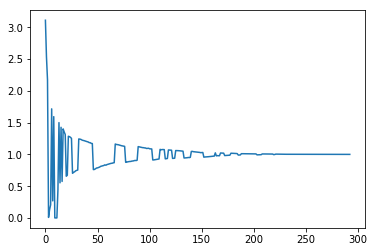

In [96]:
# Normalize the data.
X = StandardScaler().fit_transform(X)

# Transpose X to use with NumPy
Xt = X.T
Cx = np.cov(Xt)
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
# Plot the eigenvalues
plt.plot(eig_val_cov)
plt.show()


In [97]:
# Reduce it to two components.
X_pca = PCA(5).fit_transform(X)

In [98]:
start = datetime.now()
# Alright! We've done our prep, let's build the model.
# Neural networks are hugely computationally intensive.
# This may take several minutes to run.

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X_pca, Y)
print(mlp.score(X_pca, Y))
print(cross_val_score(mlp, X_pca, Y, cv=5))
print('It took the following time to complete this task:', datetime.now() - start)

0.67936
[ 0.67256549  0.66243376  0.6654      0.62456246  0.65873175]
It took the following time to complete this task: 0:06:11.216481


In [99]:
Y.value_counts()/len(Y)

Prints & Illustrated Books    0.52160
Photography                   0.22786
Architecture & Design         0.11208
Drawings                      0.10414
Painting & Sculpture          0.03432
Name: Department, dtype: float64

In [100]:
start = datetime.now()
# Alright! We've done our prep, let's build the model.
# Neural networks are hugely computationally intensive.
# This may take several minutes to run.

# Establish and fit the model, with a two layer, 500/100 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(500, 100))
mlp.fit(X_pca, Y)
print(mlp.score(X_pca, Y))
print(cross_val_score(mlp, X_pca, Y, cv=5))
print('It took the following time to complete this task:', datetime.now() - start)

0.73304
[ 0.69426115  0.68953105  0.7088      0.66226623  0.68123625]
It took the following time to complete this task: 0:07:24.003389


In [101]:
start = datetime.now()
# Alright! We've done our prep, let's build the model.
# Neural networks are hugely computationally intensive.
# This may take several minutes to run.

# Establish and fit the model, with a two layer, 500/100 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(400, 50, 25))
mlp.fit(X_pca, Y)
print(mlp.score(X_pca, Y))
print(cross_val_score(mlp, X_pca, Y, cv=5))
print('It took the following time to complete this task:', datetime.now() - start)

0.72414
[ 0.70975805  0.68923108  0.6911      0.64536454  0.66623325]
It took the following time to complete this task: 0:04:15.689113


In [102]:
start = datetime.now()
# Alright! We've done our prep, let's build the model.
# Neural networks are hugely computationally intensive.
# This may take several minutes to run.

# Establish and fit the model, with a two layer, 500/100 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25, 5))
mlp.fit(X_pca, Y)
print(mlp.score(X_pca, Y))
print(cross_val_score(mlp, X_pca, Y, cv=5))
print('It took the following time to complete this task:', datetime.now() - start)

0.70656
[ 0.69516097  0.67653235  0.68        0.65966597  0.67633527]
It took the following time to complete this task: 0:02:36.429723


In [103]:
# SKlearn has a tool that will optimize mlp
start = datetime.now()
mlp = MLPClassifier()
# Set the hyperparameters
parameters = {'hidden_layer_sizes':[(400, 50, 25), (500, 100), (1000, 4)], 'alpha': 
              [0.01,0.03,0.05,0.10], 'learning_rate': ['constant', 'adaptive'], 'activation': ['relu', 'logistic']}
# Run it through the tool.
grid = GridSearchCV(mlp, parameters).fit(X_pca, Y)
predicted = grid.predict(X_pca)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

#Put those parameters in a dictionary to call.
parameters = grid.best_params_

print('It took the following time to complete this task:', datetime.now() - start)

The best parameters are {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (400, 50, 25), 'learning_rate': 'constant'} with a score of %0.69032
It took the following time to complete this task: 10:06:00.789328


In [104]:
mlp = MLPClassifier(hidden_layer_sizes=parameters['hidden_layer_sizes'],
                   alpha=parameters['alpha'],
                   learning_rate=parameters['learning_rate'],
                   activation=parameters['activation'])
mlp.fit(X_pca, Y)
print(mlp.score(X_pca, Y))
print(cross_val_score(mlp, X_pca, Y, cv=5))

0.74034
[ 0.68896221  0.68413159  0.6879      0.6469647   0.65853171]
